<a href="https://colab.research.google.com/github/channdankumar/Medical_Cost_Prediction/blob/main/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medical Cost Prediction**

The aimof thisanalysis is to predict the medical expense based on the patient information. The dataset used for this analysis is imsurance dataset. The dataset contains 1338 observations and 7 variables.



In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Data Preprocessing**

In [ ]:
# number of rows and columns
df.shape

(1338, 7)

In [ ]:
# checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# checking discriptive stastics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Exploratory data analysis**

Visualization of the data is a good way to understand the data. In this section , I will plot the distribustion of each variable to get an overview about their counts and distributions.

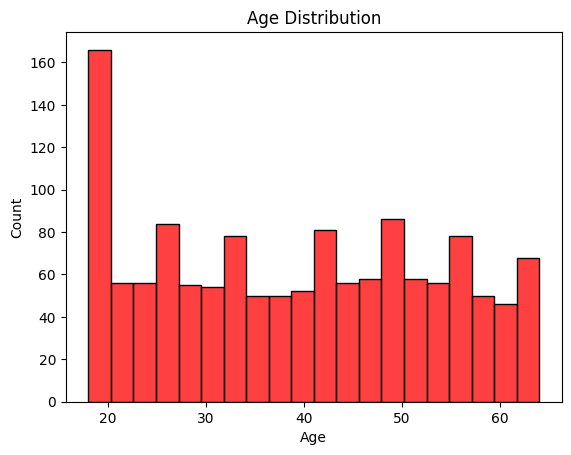

In [ ]:
# age distribution
sns.histplot(df.age,bins=20,kde=False,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**# gender plot**

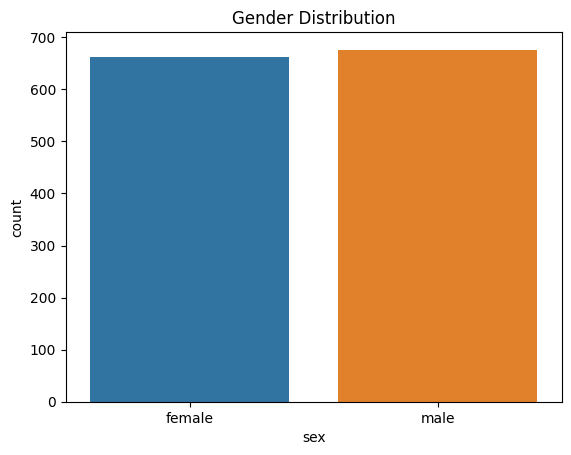

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame with a column 'sex' containing gender information

# Create the countplot
sns.countplot(x='sex', data=df)

# Set the title
plt.title('Gender Distribution')

# Show the plot
plt.show()


kde me jb hum False likhte h to Histogram plt deta h ,
or jub hm kde me True likhte h to bell hota h

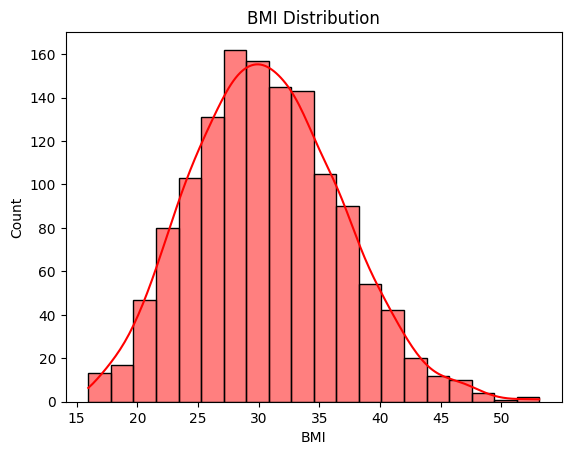

In [ ]:
from seaborn.distributions import Histogram
# bmi distribution


sns.histplot(df.bmi,bins=20,kde=True,color='RED')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

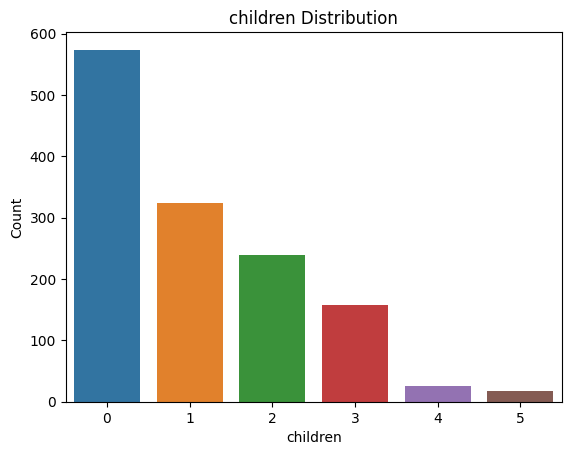

In [ ]:
# child count distribution
sns.countplot(x='children', data=df)
plt.title('children Distribution')
plt.xlabel('children')
plt.ylabel('Count')
plt.show()

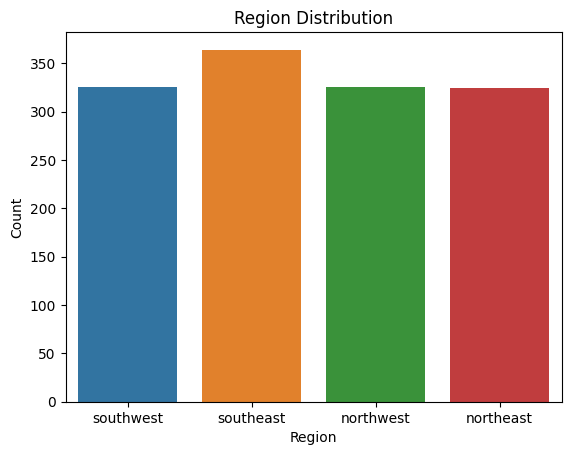

In [ ]:
# region wise plot
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The count of patient from southeast is slightly higher
then the other regions.but the number of patients from
other regions are almost equal.

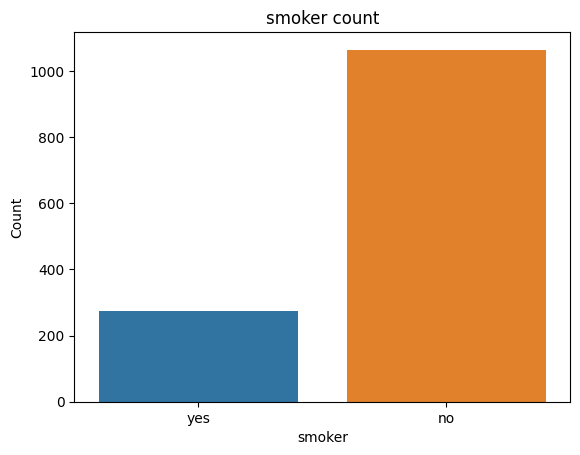

In [ ]:
# count of smokers
sns.countplot(x='smoker', data=df)
plt.title('smoker count')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()

smokers are very few in the dataset. Nearly 80% of the patients are non smokers.

<Axes: xlabel='smoker', ylabel='count'>

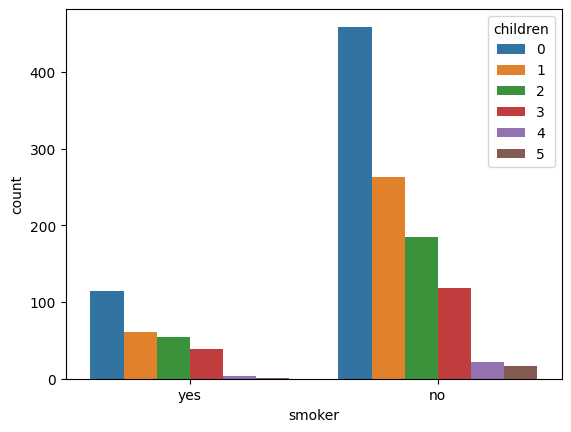

In [ ]:
sns.countplot(x=df.smoker, hue= df.children)

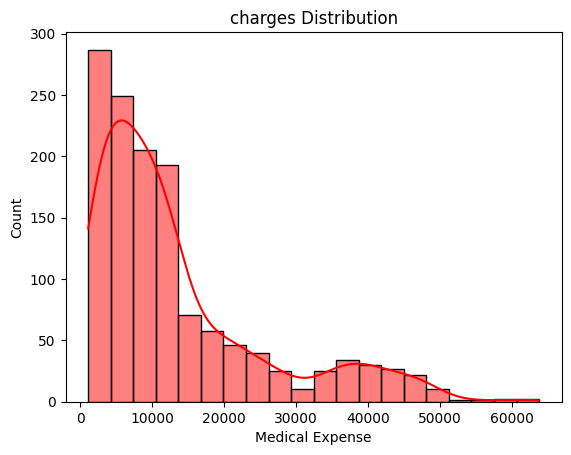

In [ ]:
from sqlalchemy import false
# charges distribution
sns.histplot(df.charges,bins=20,kde=True,color='RED')
plt.title('charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expences above 50000.
From the above plots, we have clear understand about the count of patients under each category of the variable.

**Correlation**

In [ ]:
# correlation matrix
df.corr()

<ipython-input-39-a32c6888aa4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-40-7f869916aa1d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


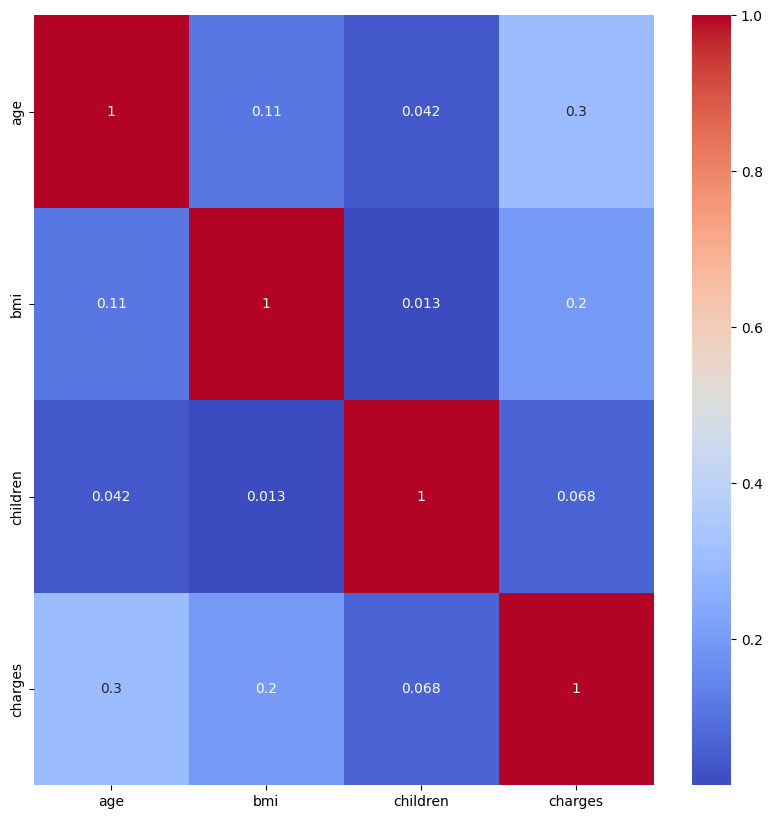

In [ ]:
# plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

The variable smoker show a significant coorelation with the medical expenses. Now i will export more into patients smoking habits and there relation with other factor.

**Plotting the smoking count with patients gender.**

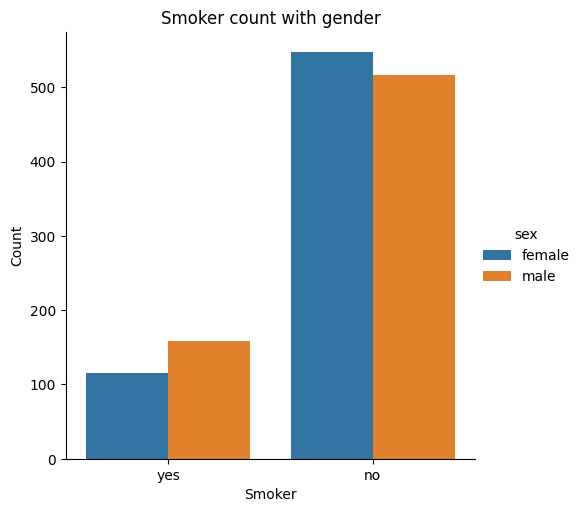

In [ ]:
sns.catplot(x="smoker",kind="count",hue= 'sex',data=df)
plt.title('Smoker count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


Male smoker the more then the female skoker, so i will assumed the the more medical
expenses need the male smoker as compare the female smoker.

<Axes: xlabel='sex', ylabel='charges'>

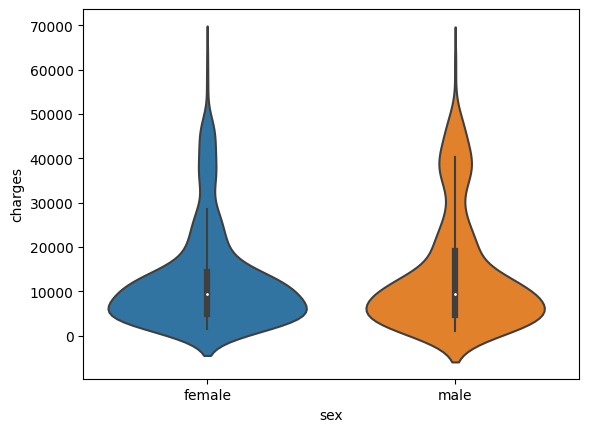

In [ ]:
sns.violinplot(x='sex',y='charges', data=df)

        ** BY :    CHANDAN KUMAR **